In [38]:
import os
import numpy as np
import glob
import re
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
from scipy.optimize import curve_fit
import pandas as pd
phot = Table.read("jades_goods-n_photometry.fits")
print(phot.colnames)
#print(phot[:5])


obj_id = 83030

row = phot[phot["NIRSpec_ID"] == obj_id]  

print(row)

['ID', 'RA', 'DEC', 'F090W_KRON', 'F115W_KRON', 'F150W_KRON', 'F182M_KRON', 'F200W_KRON', 'F210M_KRON', 'F277W_KRON', 'F335M_KRON', 'F356W_KRON', 'F410M_KRON', 'F444W_KRON', 'F435W_KRON', 'F606W_KRON', 'F775W_KRON', 'F814W_KRON', 'F850LP_KRON', 'F105W_KRON', 'F125W_KRON', 'F140W_KRON', 'F160W_KRON', 'F090W_KRON_e', 'F115W_KRON_e', 'F150W_KRON_e', 'F182M_KRON_e', 'F200W_KRON_e', 'F210M_KRON_e', 'F277W_KRON_e', 'F335M_KRON_e', 'F356W_KRON_e', 'F410M_KRON_e', 'F444W_KRON_e', 'F435W_KRON_e', 'F606W_KRON_e', 'F775W_KRON_e', 'F814W_KRON_e', 'F850LP_KRON_e', 'F105W_KRON_e', 'F125W_KRON_e', 'F140W_KRON_e', 'F160W_KRON_e', 'NIRSpec_ID']
   ID           RA               DEC         ... F160W_KRON_e NIRSpec_ID
------- ----------------- ------------------ ... ------------ ----------
1083030 189.2425667551132 62.238525839365984 ...    13.995314      83030


In [33]:
from astropy.io import fits

fitsfile = "spectra/jades-gdn09-v4_prism-clear_1181_44699.spec.fits" #arbitrary folder where the spectra are saved

with fits.open(fitsfile) as hdul:
    hdul.info()
    
    data = hdul[1].data
    print("Column names in the spectrum table:")
    print(data.columns.names)

Filename: spectra/jades-gdn09-v4_prism-clear_1181_44699.spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SPEC1D        1 BinTableHDU    366   473R x 9C   [D, D, D, D, D, D, D, D, D]   
  2  SCI           1 ImageHDU       343   (473, 31)   float64   
  3  WHT           1 ImageHDU       343   (473, 31)   float64   
  4  PROFILE       1 ImageHDU       343   (473, 31)   float64   
  5  PROF1D        1 BinTableHDU     25   31R x 3C   [D, D, D]   
  6  BACKGROUND    1 ImageHDU       343   (473, 31)   float64   
  7  SLITS         1 BinTableHDU    103   3R x 47C   [66A, K, K, D, D, D, D, D, K, 10A, D, D, D, D, 3A, K, K, D, D, K, K, K, K, K, K, K, 4A, 5A, 5A, 25A, K, K, D, K, K, K, 7A, D, D, D, D, 17A, K, 4A, K, D, D]   
Column names in the spectrum table:
['wave', 'flux', 'err', 'sky', 'path_corr', 'npix', 'flux_sum', 'profile_sum', 'var_sum']


In [34]:

PHOT_FITS = "jades_goods-n_photometry.fits"  


ztable = pd.read_csv("redshifts.csv")
zdict = dict(zip(ztable["ID"], ztable["z"]))

def gauss(x, amp, mu, sigma, c):
    return amp * np.exp(-(x-mu)**2/(2*sigma**2)) + c

In [42]:
filters_info = {
 'F090W':(0.788,1.024),'F115W':(0.998,1.306),'F150W':(1.304,1.695),
 'F200W':(1.725,2.260),'F277W':(2.367,3.220),'F356W':(3.073,4.080),'F444W':(3.804,5.100),
 'F435W':(0.361,0.488),'F606W':(0.463,0.718),'F775W':(0.680,0.863),'F814W':(0.687,0.963),
 'F850LP':(0.801,1.086),'F105W':(0.896,1.213),'F125W':(1.085,1.414),'F140W':(1.186,1.613),
 'F160W':(1.386,1.700),'F182M':(1.696,2.001),'F210M':(1.962,2.234),
 'F335M':(3.120,3.644),'F410M':(3.776,4.405)
}
def nJy_to_abmag(fn):
    return -2.5*np.log10(fn) + 31.4 

def apparent_to_absolute(m_ab, z):
    DL_pc = cosmo.luminosity_distance(z).to(u.pc).value
    return m_ab - 5*(np.log10(DL_pc) - 1)

def stellar_mass_from_Muv(Muv, z):
    # Tacchella
    a = -0.5
    logM0 = -2.4*np.log10(1+z) + 11.0
    logM = a*(Muv + 19.5) + logM0
    return 10**logM, logM

In [46]:
a0, a1, b0, b1, b2 = 0.20, -0.034, -26.134, 4.722, -0.1925

def sfr_ms_popesso(logM, z):
    t = cosmo.age(z).value  # cosmic age in Gyr
    return (a1*t + b1)*logM + b2*logM**2 + (b0 + a0*t)

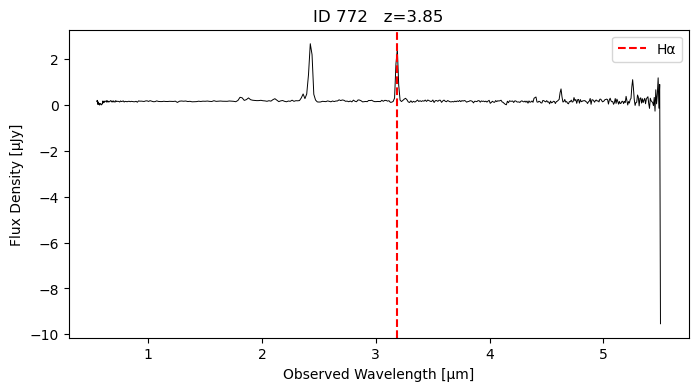

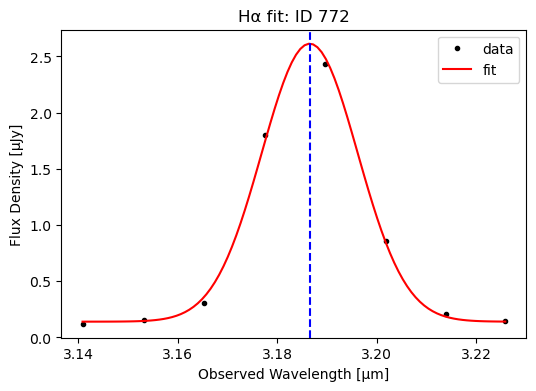

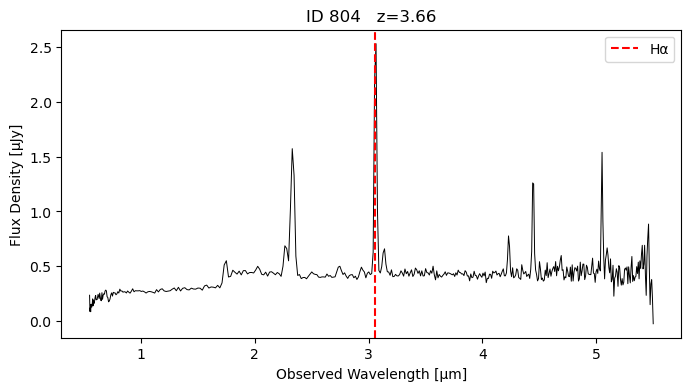

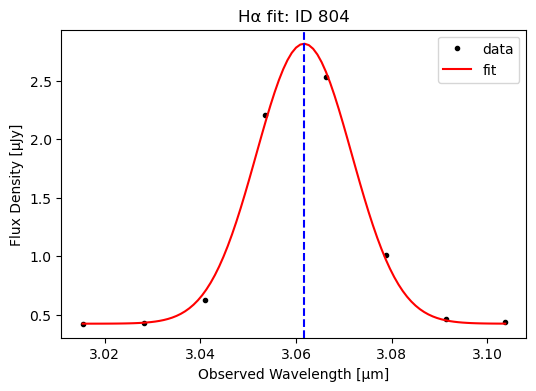

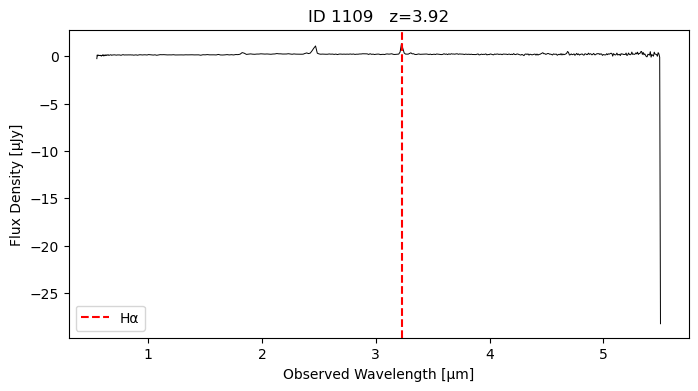

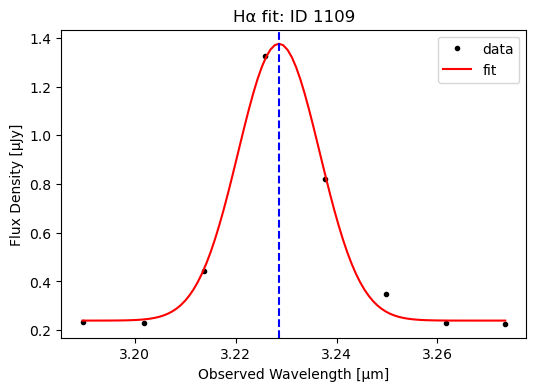

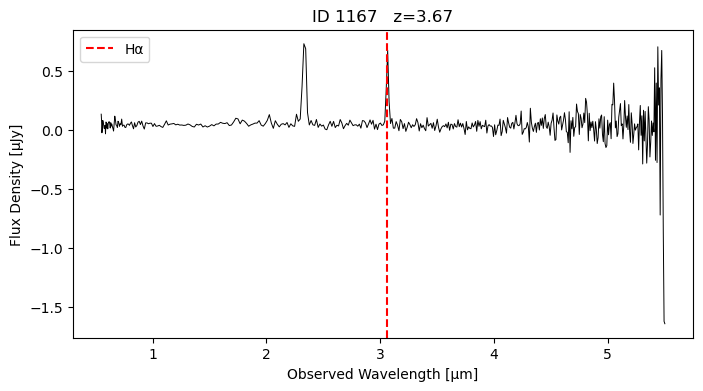

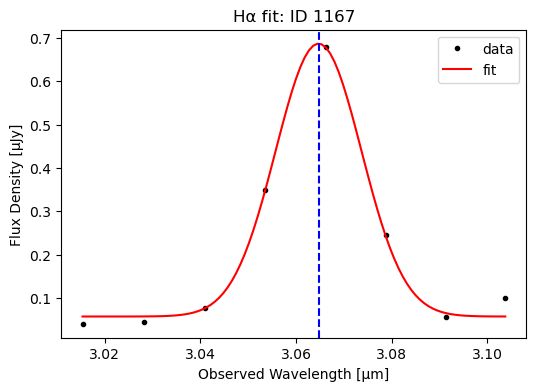

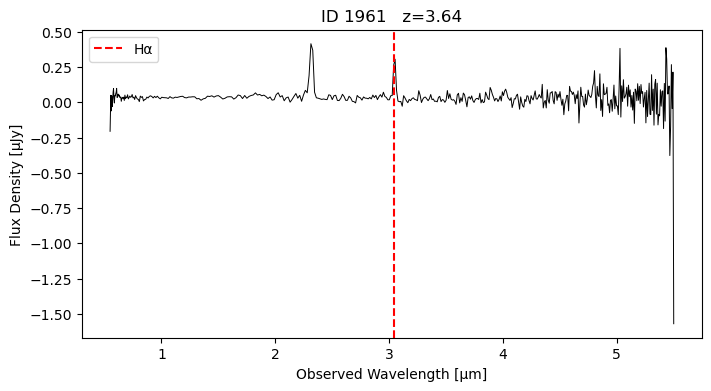

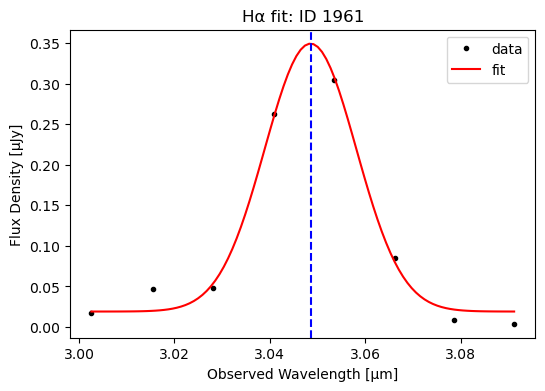

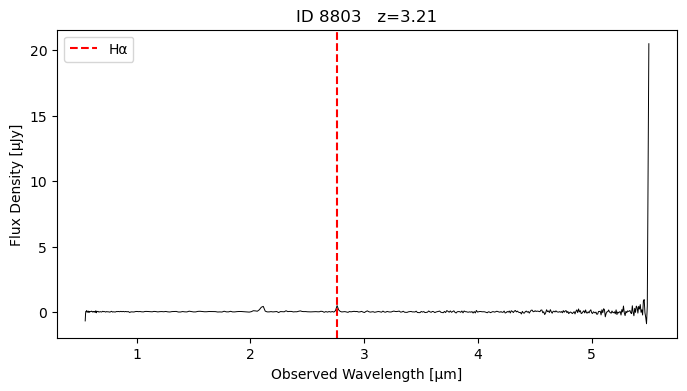

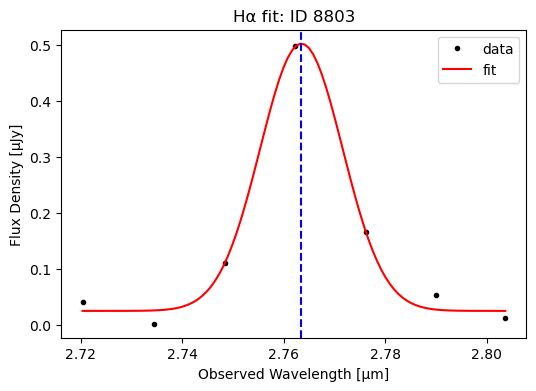

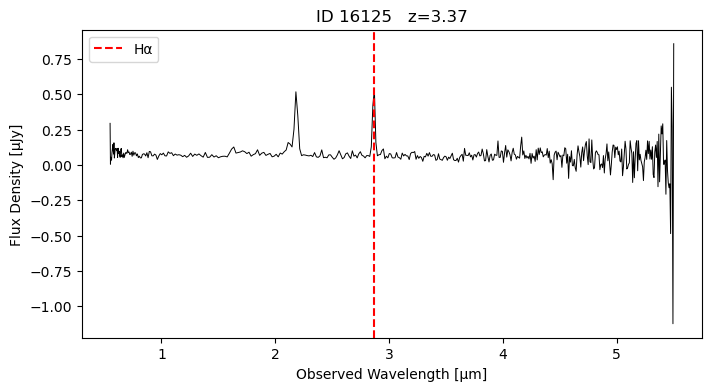

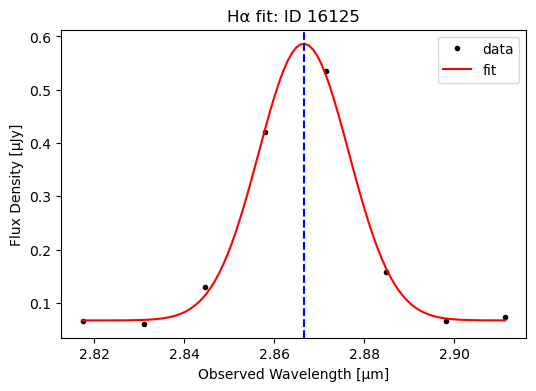

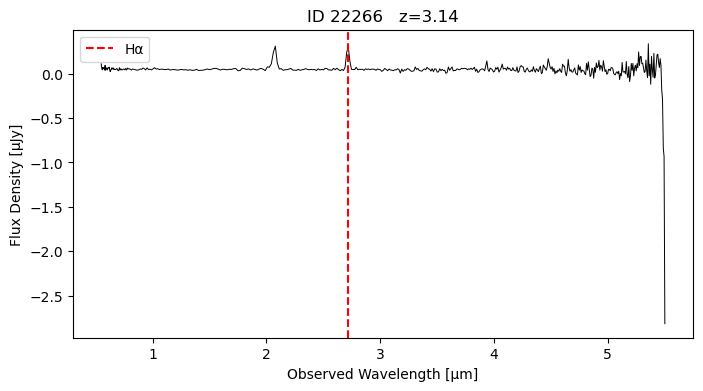

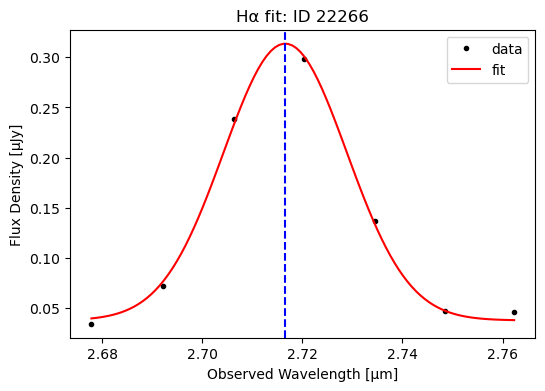

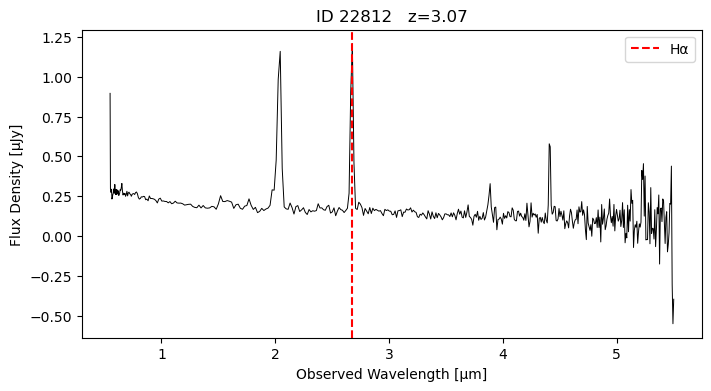

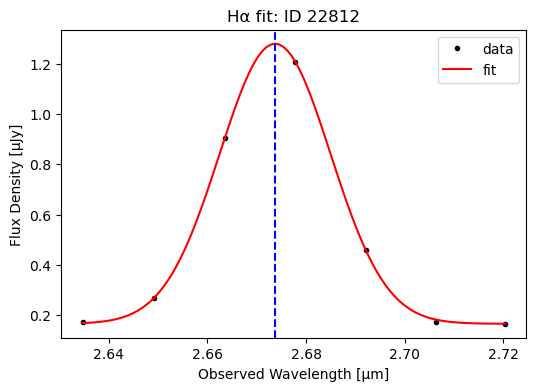

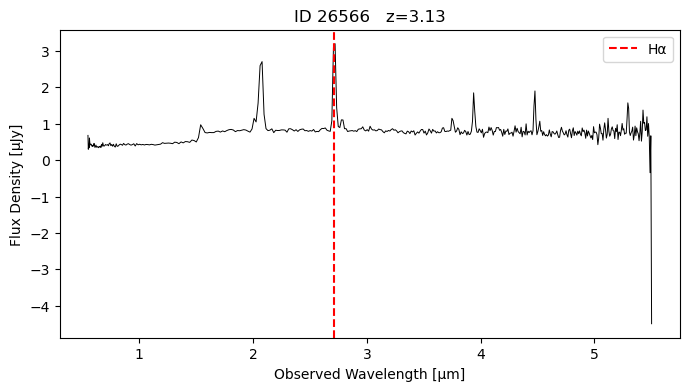

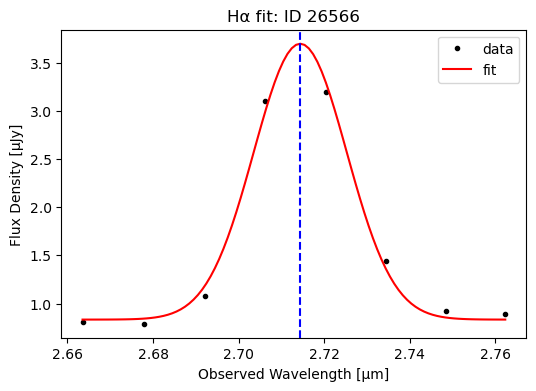

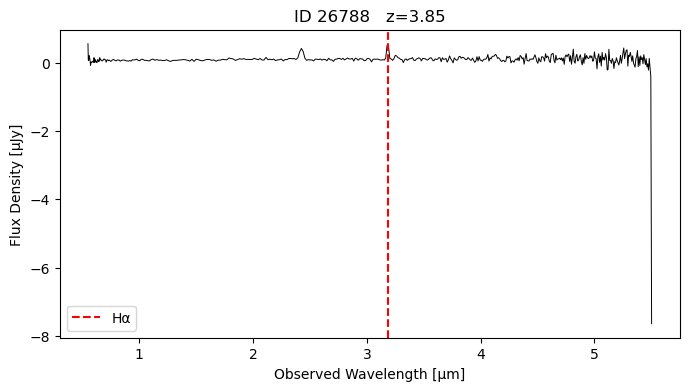

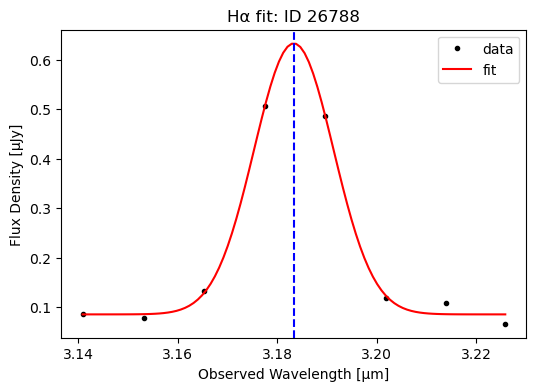

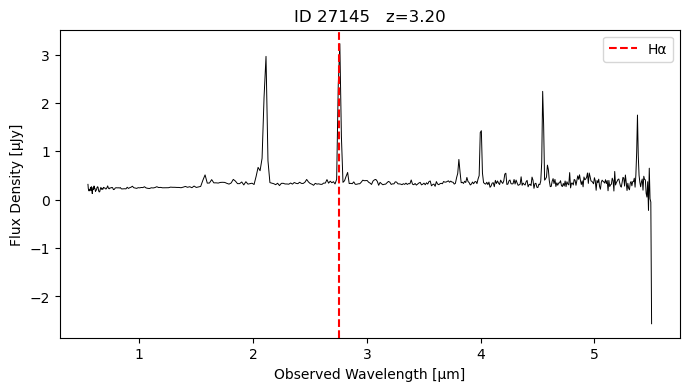

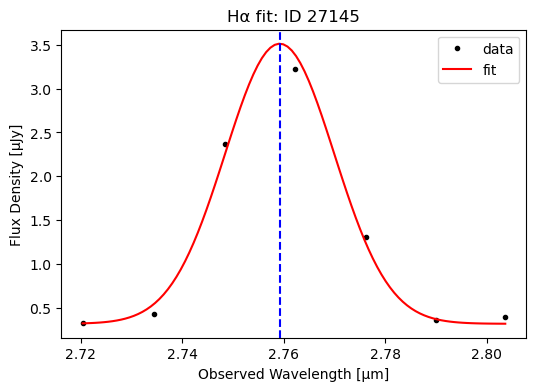

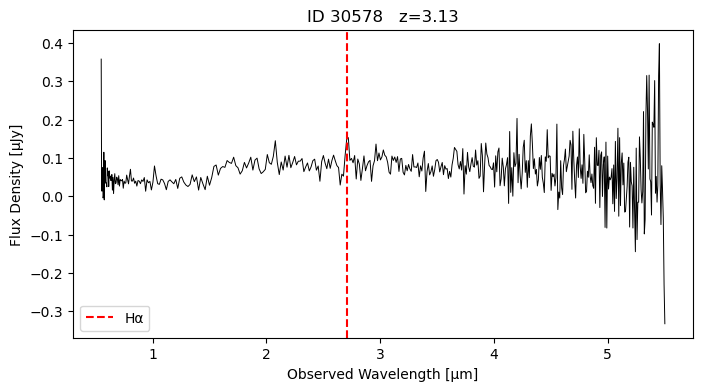

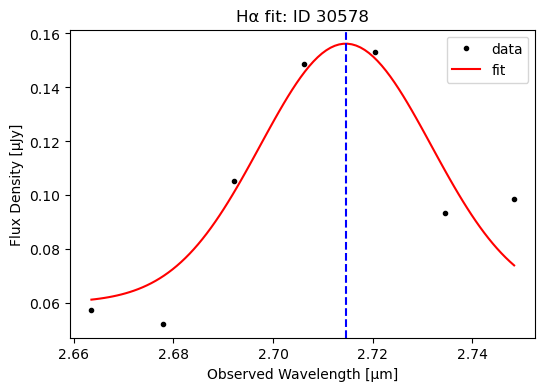

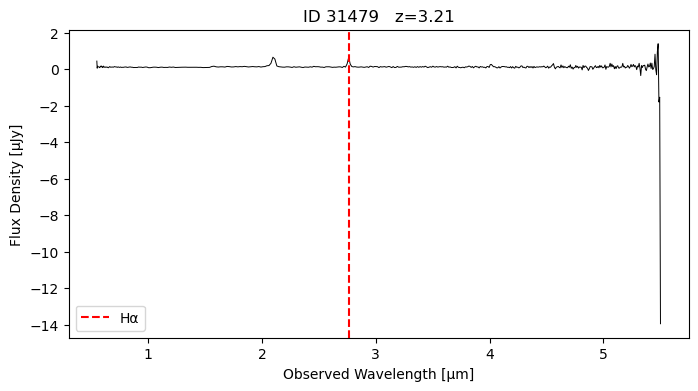

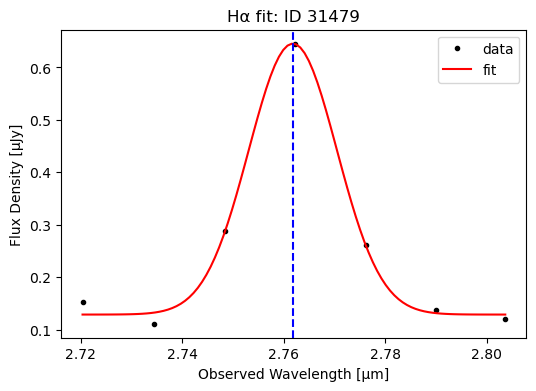

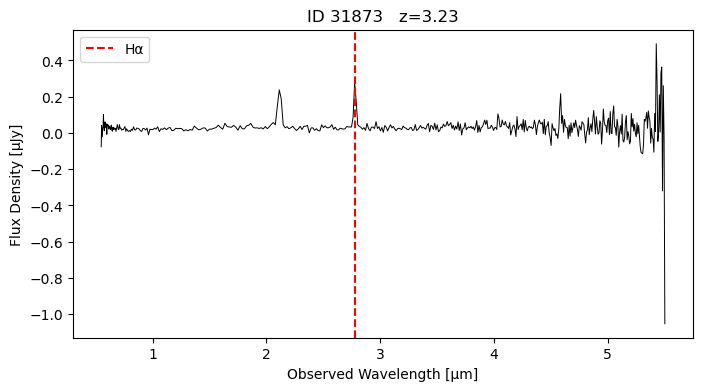

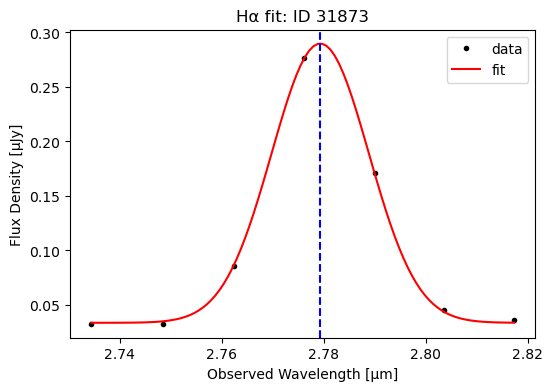

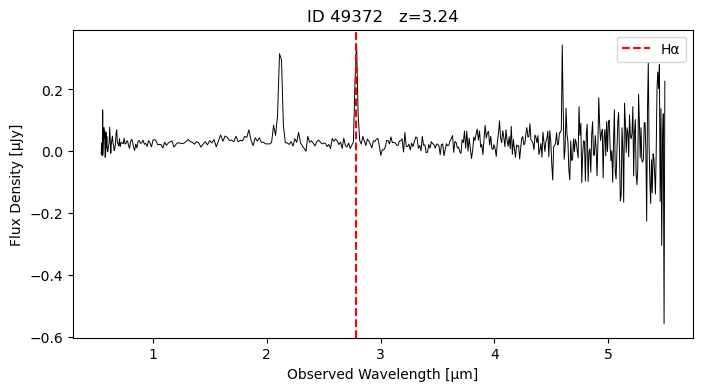

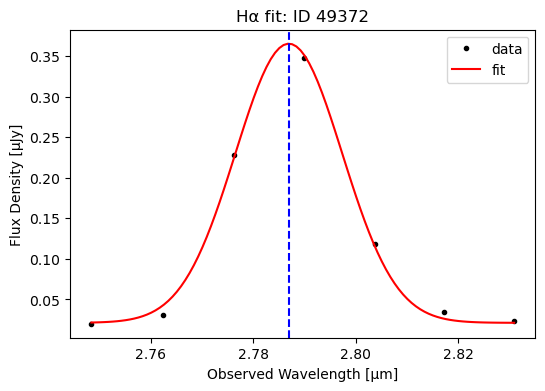

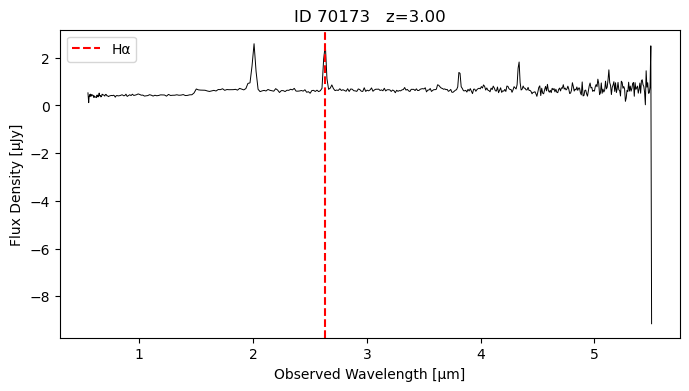

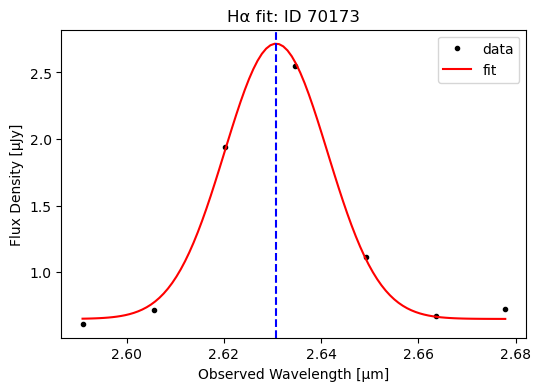

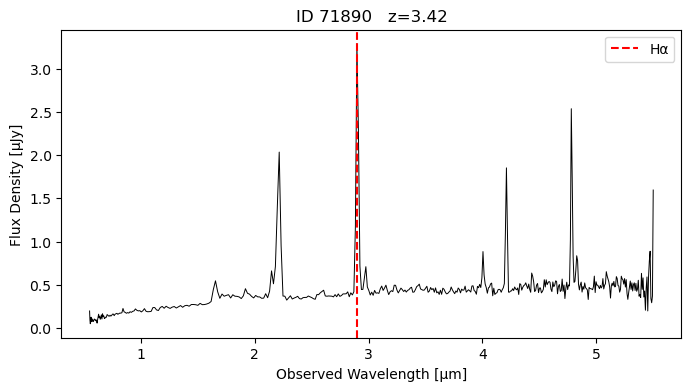

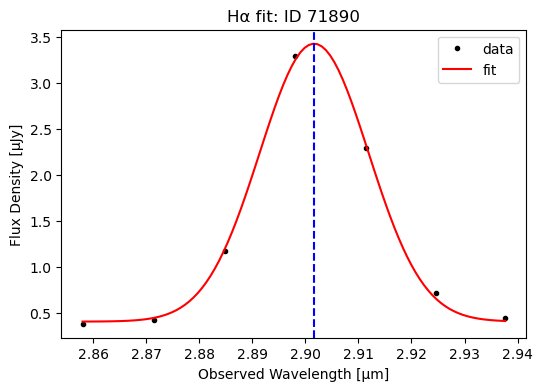

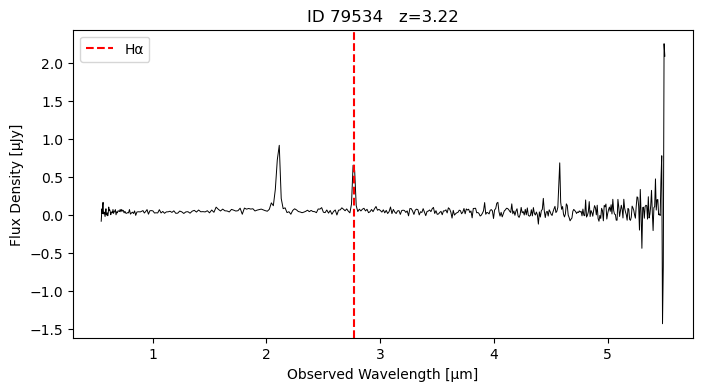

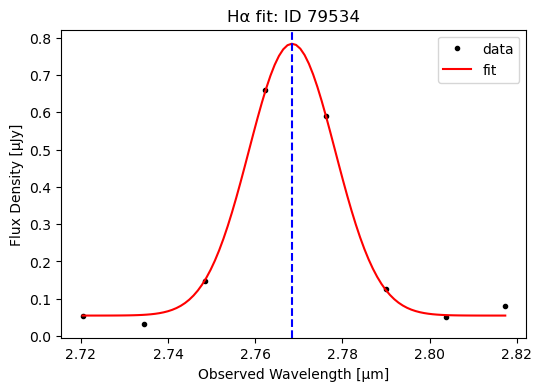

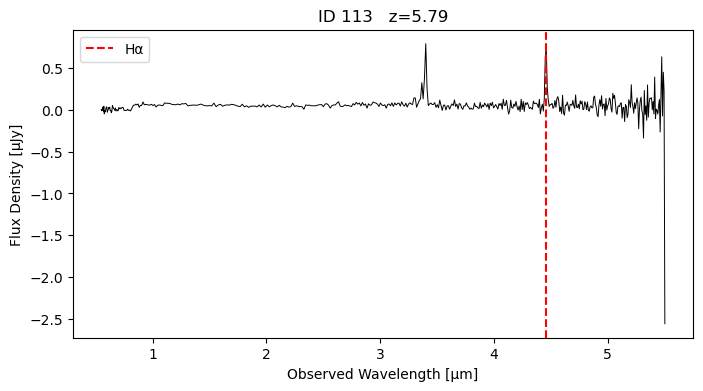

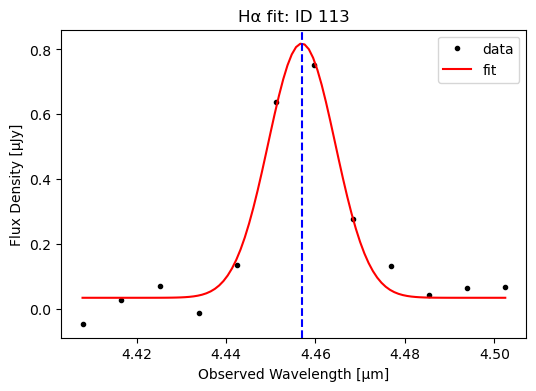

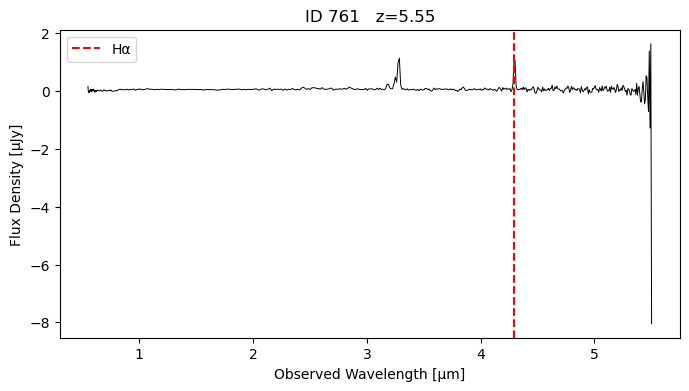

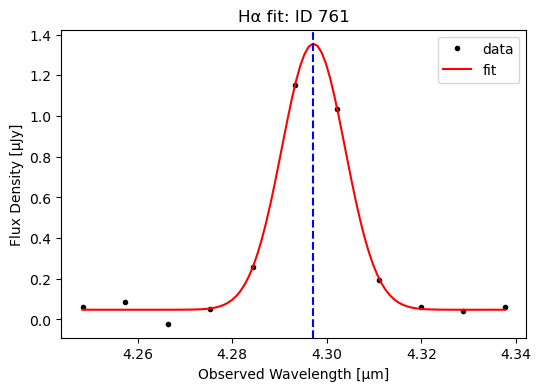

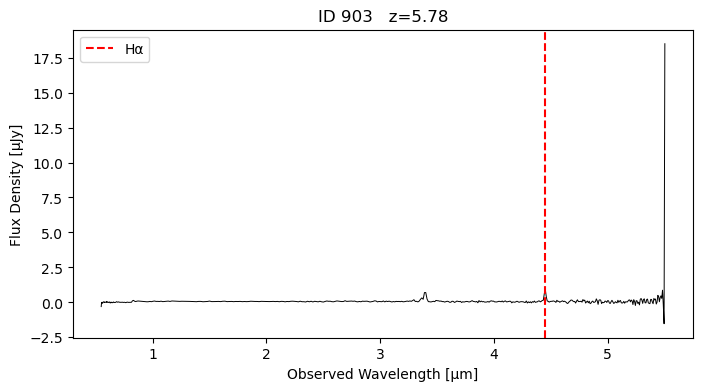

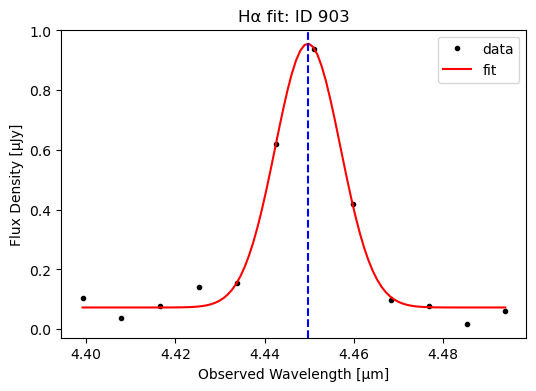

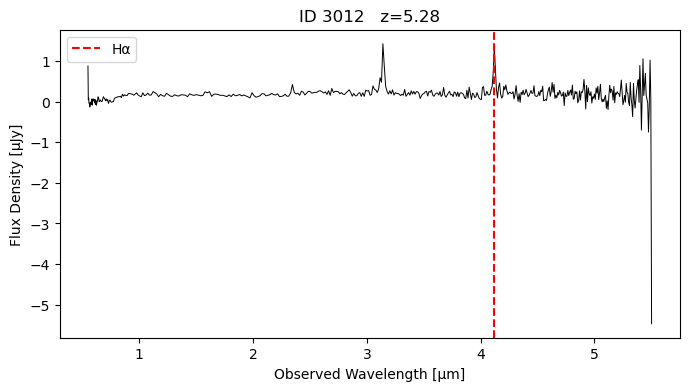

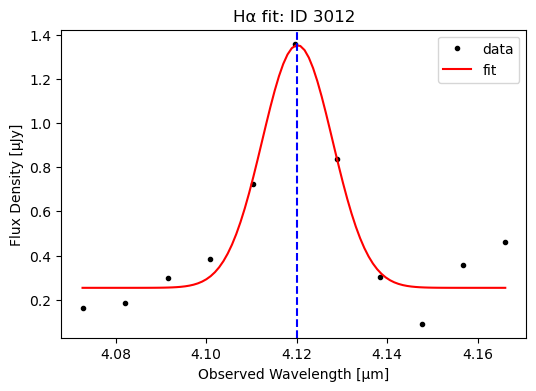

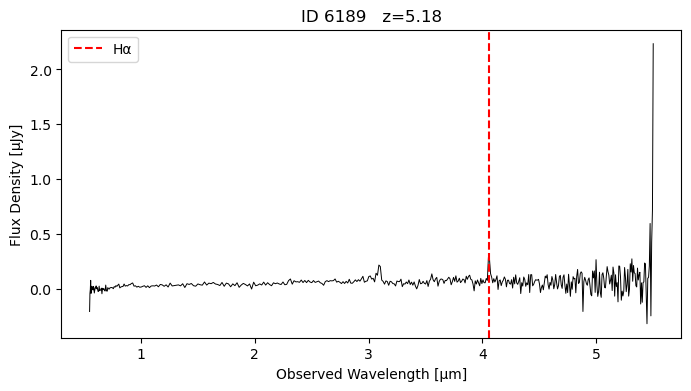

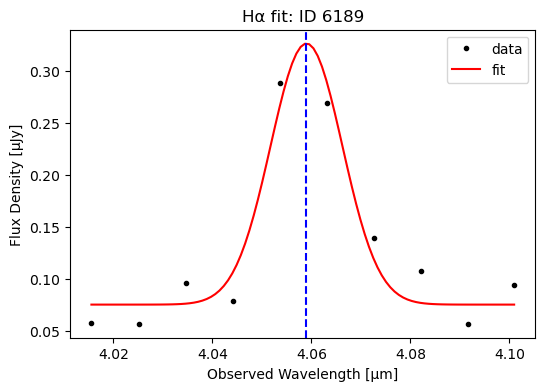

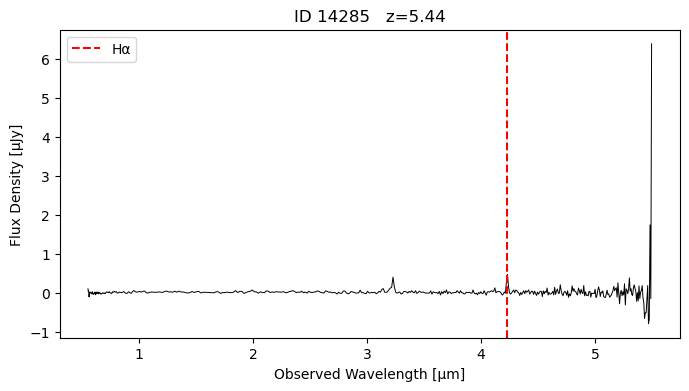

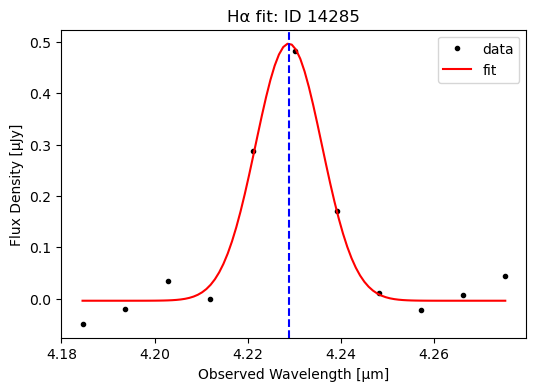

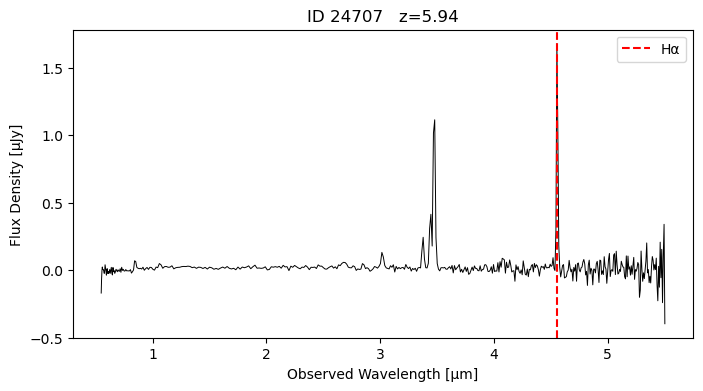

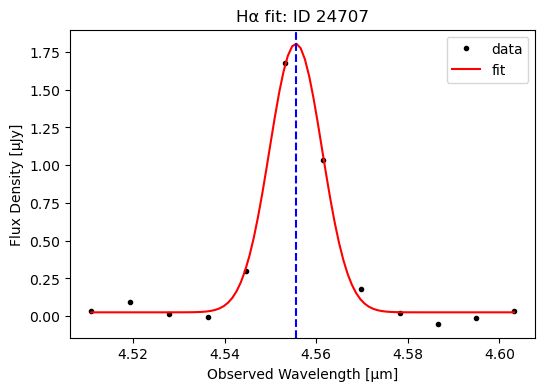

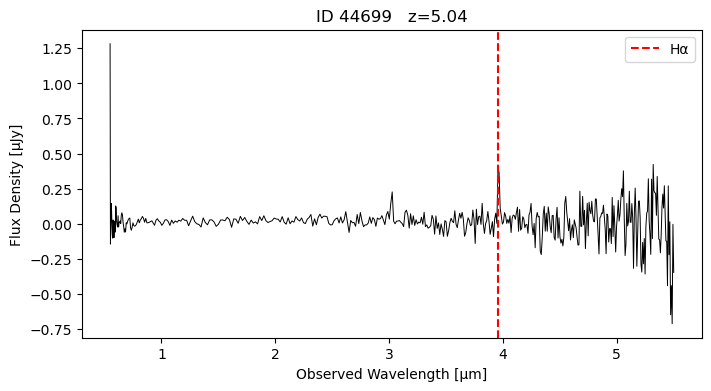

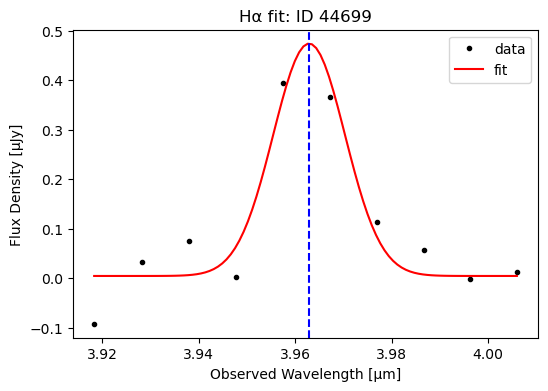

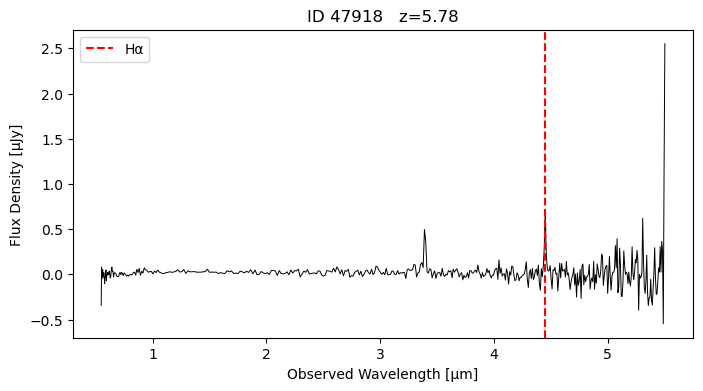

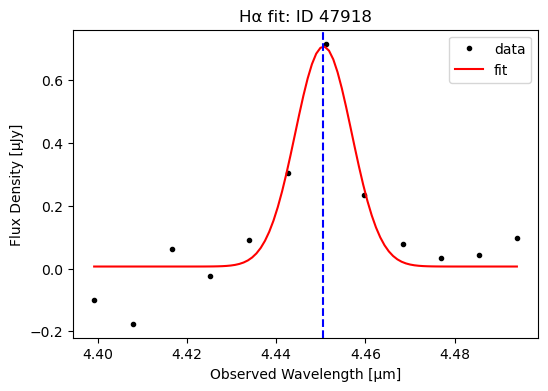

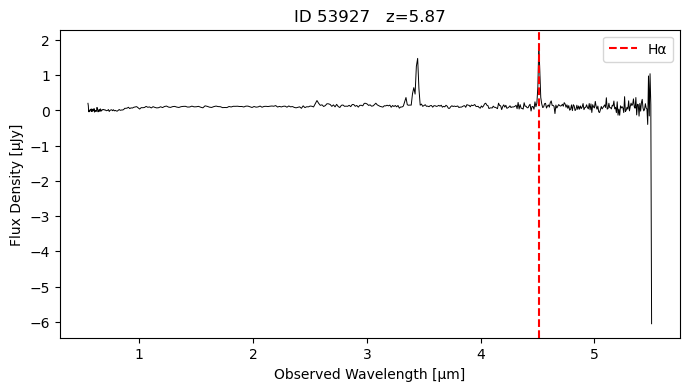

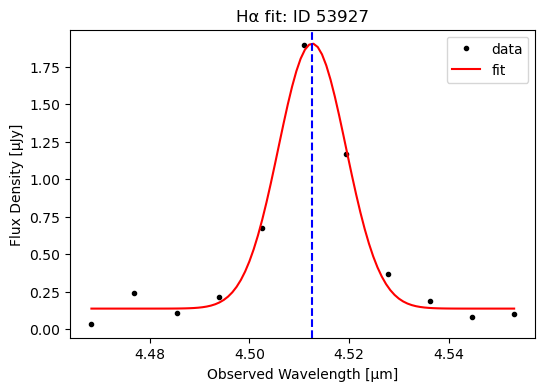

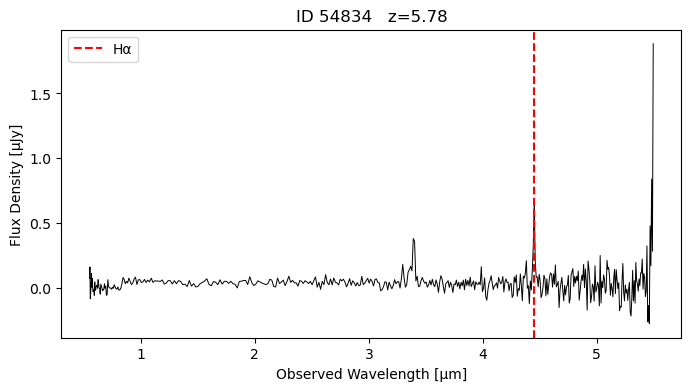

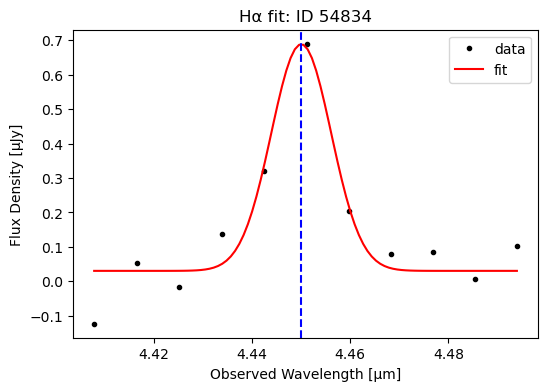

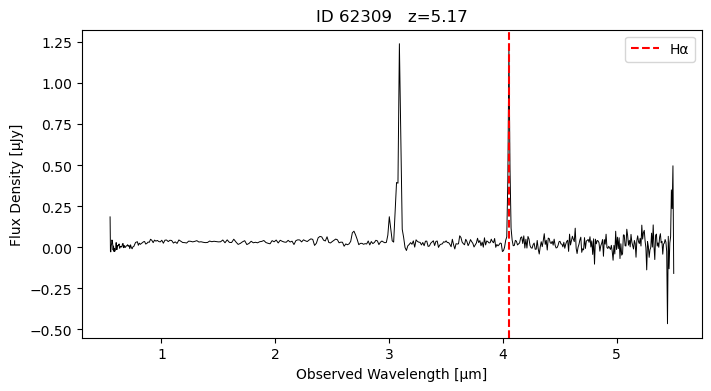

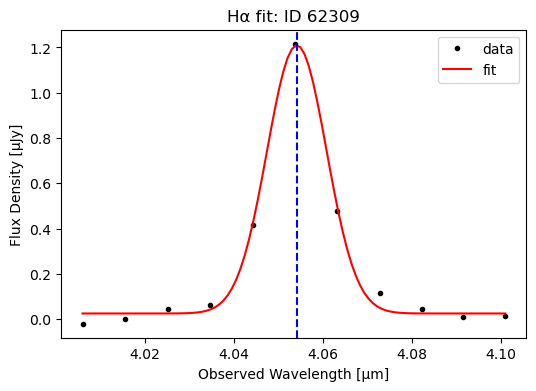

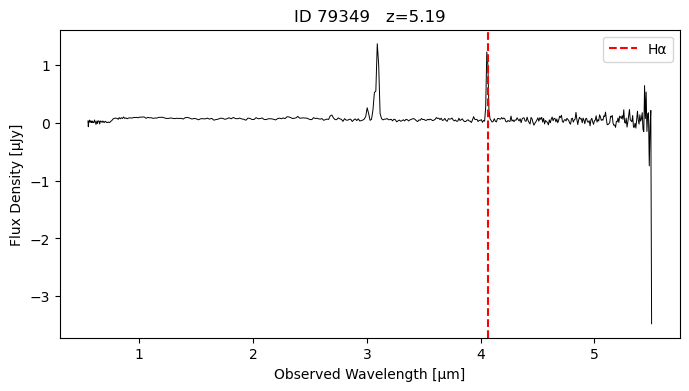

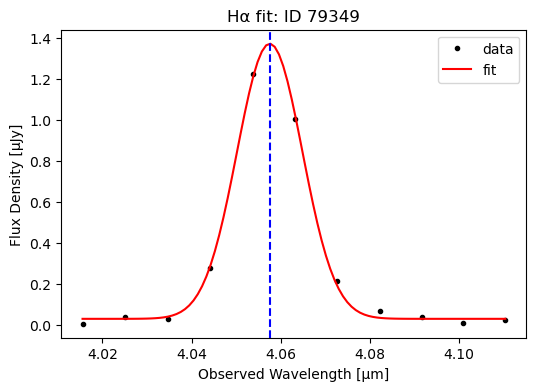

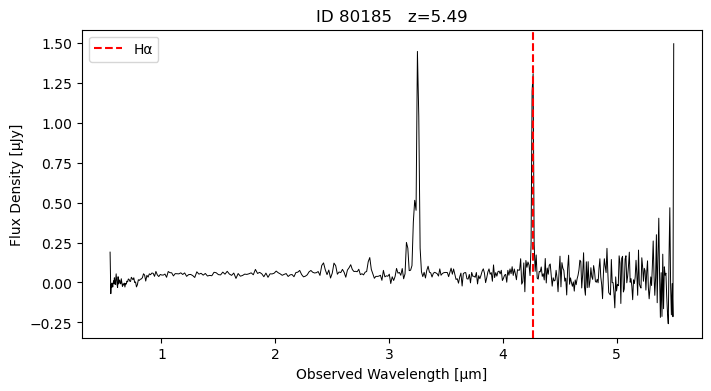

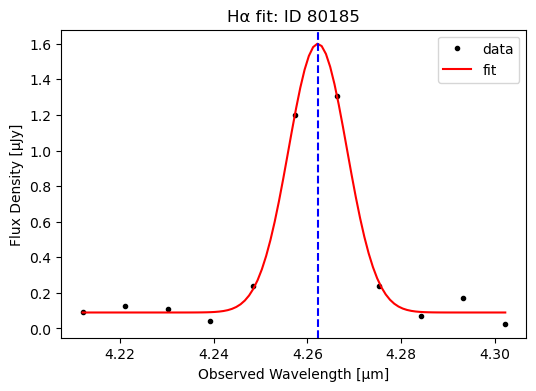

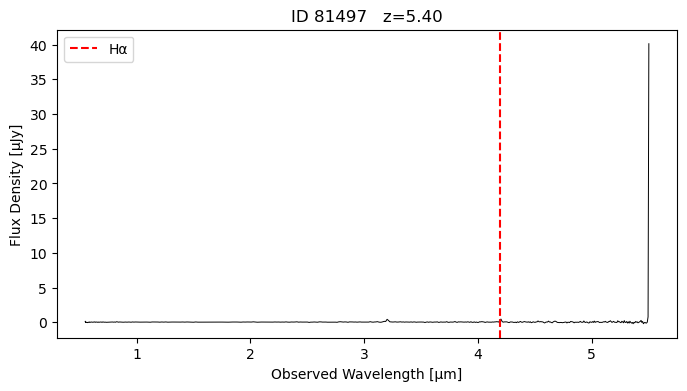

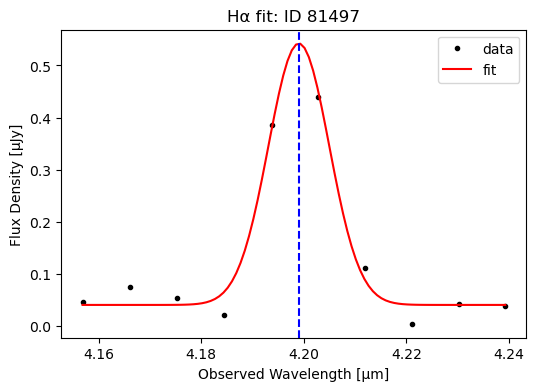

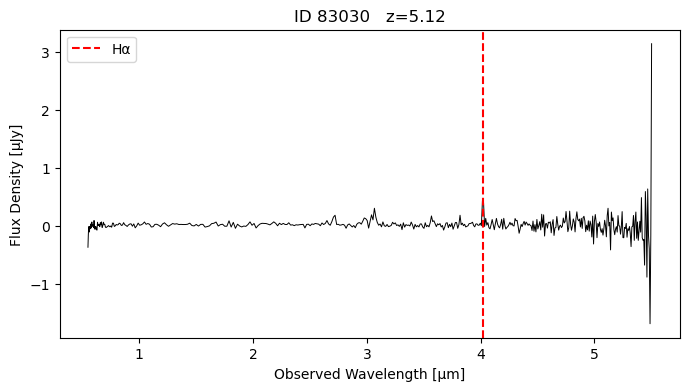

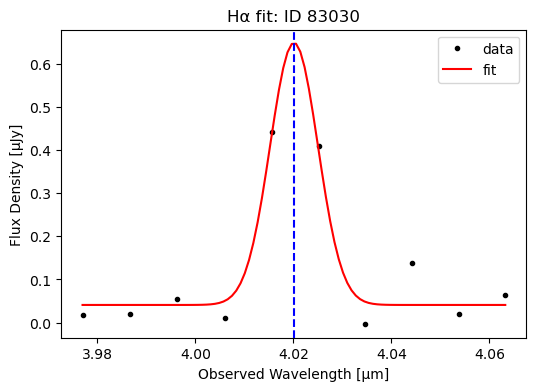

       ID       z        SFR    SFR_err        Muv         Mstar       logM  \
0     772  3.8531  14.289607   9.876325 -21.794309  3.167438e+10  10.500708   
1     804  3.6645  13.707940   9.473616 -22.555865  8.371444e+10  10.922800   
2    1109  3.9183   5.588517   3.870060 -22.066232  4.195270e+10  10.622760   
3    1167  3.6673   3.255422   2.261640 -19.170399  1.696062e+09   9.229442   
4    1961  3.6418   1.817180   1.276498 -20.190989  5.564770e+09   9.745447   
5    8803  3.2080   2.002866   1.401008 -19.319966  2.583456e+09   9.412201   
6   16125  3.3659   2.790390   1.938838 -20.725470  1.192774e+10  10.076558   
7   22266  3.1371   1.718773   1.192613 -20.526630  1.079554e+10  10.033244   
8   22812  3.0736   6.208560   4.293369 -21.728528  4.470084e+10  10.650316   
9   26566  3.1336  15.714662  10.861484 -22.126871  6.827271e+10  10.834247   
10  26788  3.8499   2.629475   1.865846 -20.219542  5.176216e+09   9.714012   
11  27145  3.2001  17.675063  12.213518 -21.807898  

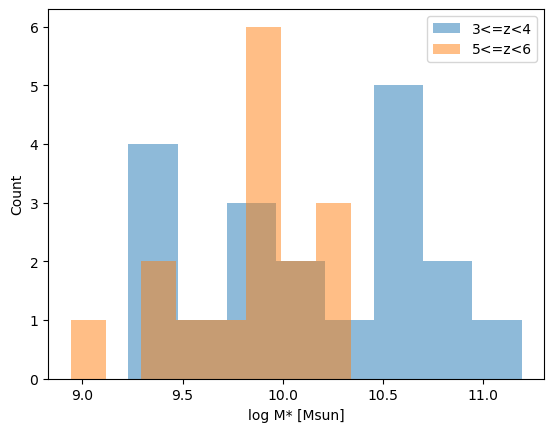

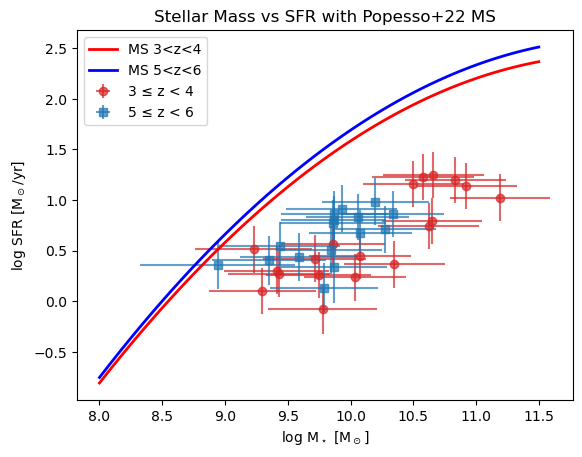

In [68]:
def process_object(fitsfile, obj_id):
    if obj_id not in zdict: 
        return None
    z = zdict[obj_id]

    #load
    data = fits.open(fitsfile)[1].data
    wave, flux, err = data['wave'], data['flux'], data['err']
    #spec plot
    halpha_obs = 0.6563 * (1 + z)  # observed wavelength µm
    plt.figure(figsize=(8,4))
    plt.plot(wave, flux, lw=0.7, color="k")
    plt.axvline(halpha_obs, color="r", ls="--", label="Hα")
    plt.xlabel("Observed Wavelength [µm]")
    plt.ylabel("Flux Density [µJy]")
    plt.title(f"ID {obj_id}   z={z:.2f}")
    plt.legend()
    plt.show()

    # Hα
    halpha_obs = 0.6563 * (1+z)
    mask = (wave > halpha_obs-0.05) & (wave < halpha_obs+0.05)
    wcut, fcut, ecut = wave[mask], flux[mask], err[mask]
    if len(wcut) < 5:
        return None

    #gaussian
    p0 = [fcut.max()-np.median(fcut), halpha_obs, 0.002, np.median(fcut)]   

    amp_guess = max(fcut.max() - np.median(fcut), 0.0)

    if obj_id == 83030:
        # allow amplitude to grow a bit, but not explode. This galaxy originally had problems fitting
        amp_max = amp_guess * 1.5 
        bounds = ([0, -np.inf, -np.inf, -np.inf],
              [amp_max,  np.inf,  np.inf,  np.inf])
        popt, pcov = curve_fit(gauss, wcut, fcut, sigma=ecut, p0=p0,
                           absolute_sigma=True, bounds=bounds)
    else:
        popt, pcov = curve_fit(gauss, wcut, fcut, sigma=ecut, p0=p0, absolute_sigma=True)
    amp, mu, sigma, c = popt
    perr = np.sqrt(np.diag(pcov))  # uncertainties
    fit = gauss(np.linspace(wcut.min(), wcut.max(), 100), *popt) #creating many samples for x in order to smooth out the gaussian shape
    #Hα fit 
    plt.figure(figsize=(6,4)) 
    plt.plot(wcut, fcut, 'k.', label="data") 
    plt.plot(np.linspace(wcut.min(), wcut.max(), 100), fit, 'r-', label="fit") 
    plt.axvline(mu, color="b", ls="--") 
    plt.xlabel("Observed Wavelength [µm]") 
    plt.ylabel("Flux Density [µJy]") 
    plt.title(f"Hα fit: ID {obj_id}") 
    plt.legend() 
    plt.show()

    #Hα flux
    mu_A, sigma_A = mu*1e4, sigma*1e4

    #gaussian line area in µJy*µm
    area = amp * sigma * np.sqrt(2*np.pi)

    #Err prop
    perr = np.sqrt(np.diag(pcov))  # parameter errors
    d_amp, d_sigma = perr[0], perr[2]

    # error on area ,amp and sigma independent
    area_err = np.sqrt((sigma*np.sqrt(2*np.pi)*d_amp)**2 +
                       (amp*np.sqrt(2*np.pi)*d_sigma)**2)

    #physical flux
    c_light = 2.998e18  # A/s
    flux_line = area * 1e-29 * c_light / mu_A**2 * 1e4   # erg/s/cm^2
    flux_err  = area_err * 1e-29 * c_light / mu_A**2 * 1e4
    
    DL = cosmo.luminosity_distance(z).cgs.value
    Lha = 4*np.pi*DL**2*flux_line
    Lha_err = 4*np.pi*DL**2*flux_err

    sfr = 5.5e-42 * Lha
    sfr_err = 5.5e-42 * Lha_err #linear propagation

    #add systematic 0.3 dex (factor 2.something)
    sfr_tot_err = np.sqrt(sfr_err**2 + (sfr*np.log(10)*0.3)**2)

    #photometry
    row = phot[phot["NIRSpec_ID"] == obj_id]
    Muv, Muv_err, Mstar, logM, logM_err = [np.nan]*5
    if len(row) > 0:
        lam_obs = 0.150*(1+z)
        good_filters = [f for f,(mn,mx) in filters_info.items() if mn<=lam_obs<=mx]
        fluxes, ferrs = [], []
        for gf in good_filters:
            col = [c for c in phot.colnames if gf in c and "_e" not in c]
            colerr = [c for c in phot.colnames if gf in c and "_e" in c]
            if col:
                fluxes.append(row[col[0]][0])
                if colerr:
                    ferrs.append(row[colerr[0]][0])
        if len(fluxes)>0:
            fn, fe = np.nanmedian(fluxes), np.nanmedian(ferrs) if ferrs else np.nan
            if fn>0:
                m_ab = nJy_to_abmag(fn)
                Muv = apparent_to_absolute(m_ab, z)
                if fe>0:
                    dm_ab = 2.5/np.log(10) * (fe/fn)
                    Muv_err = dm_ab
                Mstar, logM = stellar_mass_from_Muv(Muv, z)
                logM_err = np.sqrt((Muv_err*0.5)**2 + 0.4**2) if Muv_err else 0.4
    return {
        "ID":obj_id,"z":z,
        "SFR":sfr,"SFR_err":sfr_tot_err,
        "Muv":Muv,"Mstar":Mstar,"logM":logM,"logM_err":logM_err, "Filters":good_filters
    }
#main
spec_folder = "spectra/"
fits_files = glob.glob(os.path.join(spec_folder, "*.spec.fits"))
results = []

for f in fits_files:
    match = re.search(r"_(\d+)\.spec\.fits$", f)
    if match:
        obj_id = int(match.group(1))
        res = process_object(f, obj_id)
        if res:
            results.append(res)

#save
df = pd.DataFrame(results)
df.to_csv("sfms_results.csv", index=False)
print(df)

#hist
plt.hist(df.query("3<=z<4")["logM"].dropna(), bins=8, alpha=0.5, label="3<=z<4")
plt.hist(df.query("5<=z<6")["logM"].dropna(), bins=8, alpha=0.5, label="5<=z<6")
plt.xlabel("log M* [Msun]"); plt.ylabel("Count"); plt.legend(); plt.show()

df_lowz = df[(df["z"] >= 3) & (df["z"] < 4)]
df_highz = df[(df["z"] >= 5) & (df["z"] < 6)]

plt.errorbar(df_lowz["logM"], np.log10(df_lowz["SFR"]),
             xerr=df_lowz["logM_err"],
             yerr=np.log10(1 + df_lowz["SFR_err"]/df_lowz["SFR"]),
             fmt='o', color='tab:red', alpha=0.7, label="3 ≤ z < 4")

plt.errorbar(df_highz["logM"], np.log10(df_highz["SFR"]),
             xerr=df_highz["logM_err"],
             yerr=np.log10(1 + df_highz["SFR_err"]/df_highz["SFR"]),
             fmt='s', color='tab:blue', alpha=0.7, label="5 ≤ z < 6")

for zbin,label,color in [(3.5,"3<z<4","r"), (5.5,"5<z<6","b")]:
    logM_grid = np.linspace(8.0, 11.5, 100)
    logSFR = sfr_ms_popesso(logM_grid, zbin)
    plt.plot(logM_grid, logSFR, color=color, lw=2, label=f"MS {label}")

plt.xlabel(r"log M$_\star$ [M$_\odot$]")
plt.ylabel(r"log SFR [M$_\odot$/yr]")
plt.legend()
plt.title("Stellar Mass vs SFR with Popesso+22 MS")
plt.show()
#plt.xlabel("log M* [Msun]"); plt.ylabel("log SFR [Msun/yr]")
#plt.show()